Image inverse transformation (Biến đổi cường độ ảnh)

<function matplotlib.pyplot.show(close=None, block=None)>

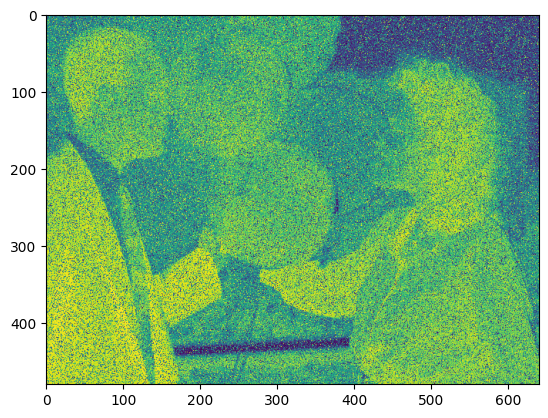

In [3]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
image = Image.open("balloons_noisy.png").convert("L")
#convert image i into an ndarray
im1 = np.array(image)
#inversion operation
im_2 = 255 - im1
#convert image 2 from ndarray to image
new_image = Image.fromarray(im_2)
image.show()
plt.imshow(new_image)
plt.show



GAMMA CORRECTION

C:\Users\thieu\AppData\Local\Temp\ipykernel_14636\506973784.py:27: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


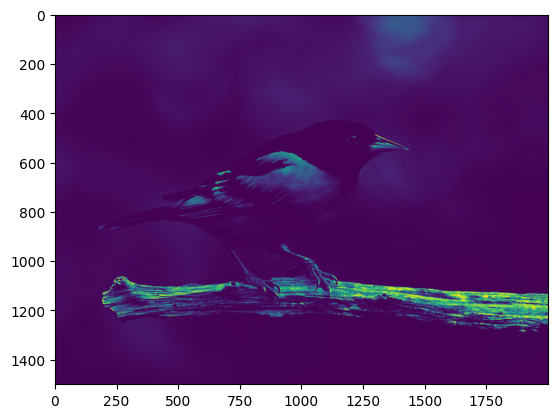

In [2]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open("bird.png").convert("L")

#convert image 1 into an ndarray
im_1 = np.array(img)

#init gamma
gamma = 5

#convert ndarray from int to float
b1 = im_1.astype(float)

#find maxium value in bl
b2 = np.max(b1)

#b3 is normalized
b3 = b1 / b2

#b2 gamma correction exponent is computed
b2 = np.log(b3) * gamma

#gamma correction is computed
c = np.exp(b2) * 255.0

#c1 is converted to type uint8 for image compatibility
c1 = c.astype(np.uint8)
d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()



Log Transformation

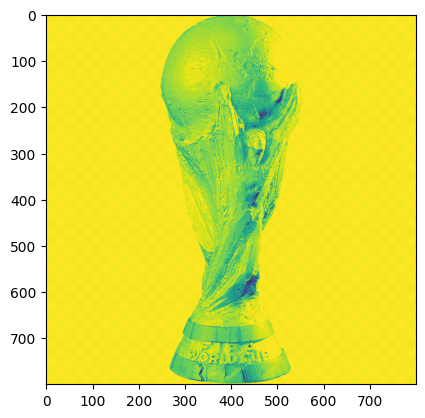

In [11]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('world cup.png').convert('L')
#convert image 1 into an ndarray
im_1 = np.asarray(img)
#convert ndarray from int to float
bl = im_1.astype (float)
#find maximum value in bl
b2 = np.max (bl)
#performing the log transformation
c = (128.0 * np.log(1 + bl))/np.log (1 + b2)
#cl is converted to type int
cl = c.astype(np.uint8)
d = Image.fromarray(cl)
img.show ()
d.show ()
plt.imshow (d)
plt.show ()

 Histogram equalization


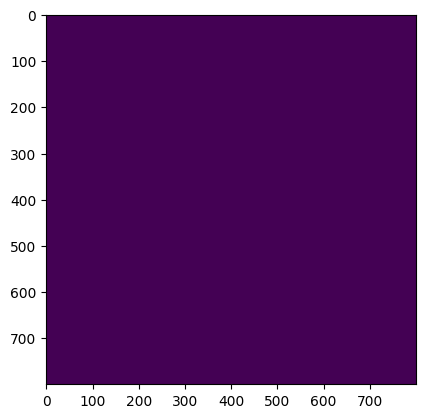

In [4]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('world cup.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
#convert 2D ndarray from 1D array
bl = iml.flatten()
#histogram and bin are computed
hist, bins = np.histogram(iml, 256, [0, 255])
#cumulative distribution function is computed
cdf = hist.cumsum()
#places where cdf=0 is masked or ignored and
# rest is stored in cdf m
cdf_m = np.ma.masked_equal (cdf, 0)
#histogram equalization is performed
num_cdf_m = cdf_m - cdf_m.min () * 255
den_cdf_m = cdf.max () - cdf_m.min ()
cdf_m = num_cdf_m/den_cdf_m
# the masked places in cdf m are now O
cdf = np.ma.filled (cdf_m, 0).astype('uint8')
# cdf values are assigned in the flattened array
im2 = cdf [bl]
# im2 is 1D so we use reshape command to
# make it into 2D
im3 = np.reshape (im2, iml.shape)
# converting im3 to an image
im4 = Image.fromarray (im3)
img.show ()
im4.show ()
plt.imshow (im4)
plt.show ()


Thay đổi ảnh với Contrast Stretching


0 255


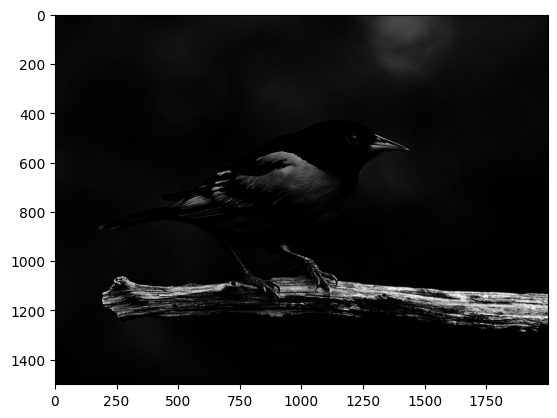

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#open a grayscale image
img = Image.open('world cup.png').convert ('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# finding the maximum and minimum pixel values
b = iml.max ()
a = iml.min()
print (a, b)
# converting iml to float
C = iml.astype (float)
# contrast stretching transformation
im2 = 255 * (c - a) / (b - a)
#im2 is converted from ndarray to image
im3 = Image.fromarray (im2)
img.show ()
im3.show ()
plt.imshow(im3)
plt.show ()

 Chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh 

In [ ]:
def image_inverse_transformation(image_path):
    # Open a grayscale image
    image = Image.open(image_path).convert("L")
    # Convert image to ndarray
    im1 = np.array(image)
    # Inversion operation
    im_2 = 255 - im1
    # Convert image 2 from ndarray to image
    new_image = Image.fromarray(im_2)
    return new_image

In [13]:
def gamma_correction(image_path, gamma):
    # Open a grayscale image
    img = Image.open(image_path).convert("L")
    # Convert image to ndarray
    im_1 = np.array(img)
    # Convert ndarray from int to float
    b1 = im_1.astype(float)
    # Find maximum value in b1
    b2 = np.max(b1)
    # Normalize
    b3 = b1 / b2
    # Gamma correction exponent
    b2 = np.log(b3) * gamma
    # Gamma correction
    c = np.exp(b2) * 255.0
    # Convert to uint8 for image compatibility
    c1 = c.astype(np.uint8)
    return Image.fromarray(c1)

In [ ]:
def log_transformation(image_path):
    # Open a grayscale image
    img = Image.open(image_path).convert('L')
    # Convert image to ndarray
    im_1 = np.asarray(img)
    # Convert ndarray from int to float
    bl = im_1.astype(float)
    # Find maximum value in bl
    b2 = np.max(bl)
    # Log transformation
    c = (128.0 * np.log(1 + bl)) / np.log(1 + b2)
    # Convert to uint8
    cl = c.astype(np.uint8)
    return Image.fromarray(cl)

In [ ]:
def histogram_equalization(image_path):
    from PIL import Image
    import numpy as np

    # Open a grayscale image
    img = Image.open(image_path).convert('L')
    # Convert image to ndarray
    iml = np.asarray(img)
    # Flatten the 2D ndarray to 1D array
    bl = iml.flatten()
    # Compute histogram and bins
    hist, bins = np.histogram(iml, 256, [0, 255])
    # Compute cumulative distribution function
    cdf = hist.cumsum()
    # Mask places where cdf=0
    cdf_m = np.ma.masked_equal(cdf, 0)
    # Histogram equalization
    num_cdf_m = (cdf_m - cdf_m.min()) * 255
    den_cdf_m = cdf.max() - cdf_m.min()
    cdf_m = num_cdf_m / den_cdf_m
    # Fill masked places in cdf_m with 0 and convert to uint8
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    # Map cdf values to the flattened array
    im2 = cdf[bl]
    # Reshape im2 to 2D
    im3 = np.reshape(im2, iml.shape)
    # Convert im3 to an image
    im4 = Image.fromarray(im3)
    return im4

In [ ]:
def contrast_stretching(image_path):
    # Open a grayscale image
    img = Image.open(image_path).convert('L')
    # Convert image to ndarray
    iml = np.asarray(img)
    # Find maximum and minimum pixel values
    b = iml.max()
    a = iml.min()
    print(a, b)
    # Convert to float
    C = iml.astype(float)
    # Contrast stretching transformation
    im2 = 255 * (C - a) / (b - a)
    # Convert to image
    im3 = Image.fromarray(im2.astype(np.uint8))
    return im3